In [13]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#initialising dataset
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [16]:
#splitting data into train and test set
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [17]:
from torch import nn

class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))

  #forward defines the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x + self.bias

In [18]:
torch.manual_seed(42)

model=LinearRegressionModel()

#Show named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  #Plots training data, test data and compares predictions.

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

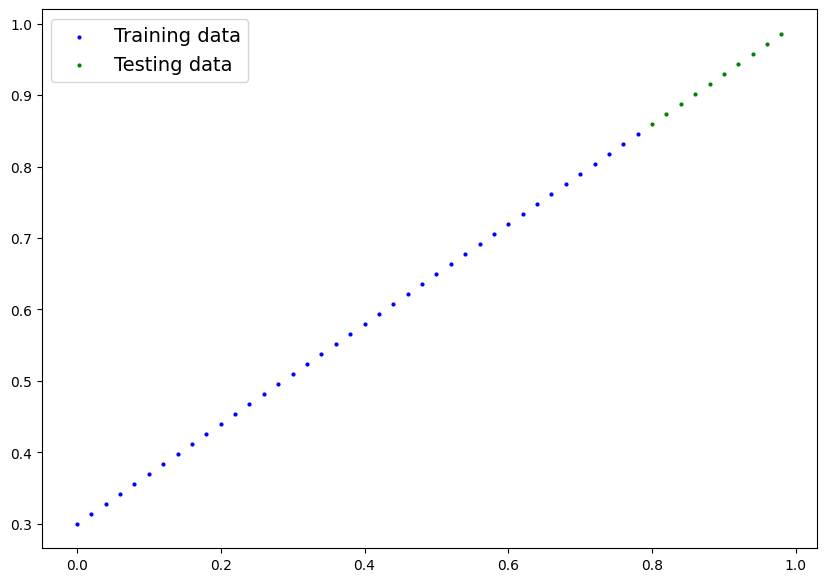

In [20]:
plot_predictions()

In [21]:
#Creating a loss function
l1_loss=nn.L1Loss()#MAE loss

#Creating an optimizer
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)#Stochastic gradient descent. Parameters are model's parameters and lr=learning rate

In [22]:
#training the model
torch.manual_seed(42)

epochs=100

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  model.train()
  y_pred=model(X_train)
  loss=l1_loss(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    test_loss=l1_loss(test_pred,y_test)

    if epochs%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 1 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 2 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.4541231691837311 
Epoch: 3 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.44065219163894653 
Epoch: 4 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.4271811842918396 
Epoch: 5 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.41371020674705505 
Epoch: 6 | MAE Train Loss: 0.24375534057617188 | MAE Test Loss: 0.40023916959762573 
Epoch: 7 | MAE Train Loss: 0.23223432898521423 | MAE Test Loss: 0.3867681920528412 
Epoch: 8 | MAE Train Loss: 0.22071333229541779 | MAE Test Loss: 0.37329721450805664 
Epoch: 9 | MAE Train Loss: 0.20919232070446014 | MAE Test Loss: 0.3598262071609497 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 11 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842

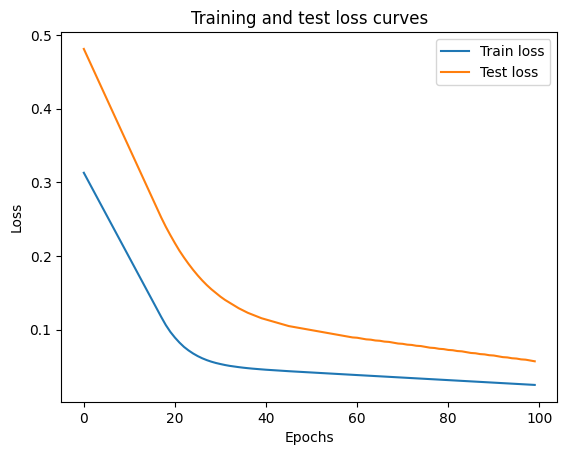

In [23]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();